In [89]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr # helps to pull the yahoo finance data
from sklearn.model_selection import train_test_split # helps to split the data into train and test
from sklearn.preprocessing import StandardScaler # helps to scale the data
from sklearn.linear_model import LinearRegression # helps to build the linear regression model
from sklearn import metrics # helps to evaluate the model

In [90]:
# Assignment Info
# Understand your data 
# specify the outcome and the predictors
# specify the independant and the dependant variables

In [91]:
# OXY -- Occidental Petroleum Corporation
# Grabbing data specifically yahoo 
data = pdr.get_data_yahoo('OXY', start='2019-11-01', end='2022-10-01')
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,42.290001,40.740002,40.750000,42.290001,9024800.0,39.824173
2019-11-04,44.619999,42.950001,42.990002,44.230000,13452300.0,41.651058
2019-11-05,44.040001,40.759998,42.150002,41.910000,19344300.0,39.466324
2019-11-06,41.709999,39.369999,41.619999,39.610001,17042700.0,37.300438
2019-11-07,40.660000,38.470001,40.090000,39.029999,15278600.0,36.754250
...,...,...,...,...,...,...
2022-09-26,59.230000,57.430000,58.310001,57.880001,25390700.0,57.880001
2022-09-27,59.470001,57.669998,58.880001,58.529999,28187500.0,58.529999
2022-09-28,61.599998,58.630001,58.959999,61.410000,22343900.0,61.410000


In [92]:
# OXY -- Occidental Petroleum Corporation
# Same as above but you specify the data_source as yahoo
data = pdr.DataReader('OXY', data_source='yahoo', start='2019-11-01', end='2022-10-01')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,42.290001,40.740002,40.750000,42.290001,9024800.0,39.824169
2019-11-04,44.619999,42.950001,42.990002,44.230000,13452300.0,41.651058
2019-11-05,44.040001,40.759998,42.150002,41.910000,19344300.0,39.466324
2019-11-06,41.709999,39.369999,41.619999,39.610001,17042700.0,37.300442
2019-11-07,40.660000,38.470001,40.090000,39.029999,15278600.0,36.754250
...,...,...,...,...,...,...
2022-09-26,59.230000,57.430000,58.310001,57.880001,25390700.0,57.880001
2022-09-27,59.470001,57.669998,58.880001,58.529999,28187500.0,58.529999
2022-09-28,61.599998,58.630001,58.959999,61.410000,22343900.0,61.410000


In [93]:
# change the position (reindex) of the close column to make indexing easier 
# close will be X
# the rest of the columns will be y

data = data.reindex(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Close']) 
data # success 

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
2019-11-01,42.290001,40.740002,40.750000,9024800.0,39.824169,42.290001
2019-11-04,44.619999,42.950001,42.990002,13452300.0,41.651058,44.230000
2019-11-05,44.040001,40.759998,42.150002,19344300.0,39.466324,41.910000
2019-11-06,41.709999,39.369999,41.619999,17042700.0,37.300442,39.610001
2019-11-07,40.660000,38.470001,40.090000,15278600.0,36.754250,39.029999
...,...,...,...,...,...,...
2022-09-26,59.230000,57.430000,58.310001,25390700.0,57.880001,57.880001
2022-09-27,59.470001,57.669998,58.880001,28187500.0,58.529999,58.529999
2022-09-28,61.599998,58.630001,58.959999,22343900.0,61.410000,61.410000


In [94]:
# save thie dataset into a csv file
data.to_csv('OXY.csv')

In [95]:
# Read the csv file to now use the data 
oxy_data = pd.read_csv('OXY.csv')

In [96]:
# Check data for missing values
oxy_data.isnull().sum() # will sum all the columns individually and return the total number of missing values

Date         0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Close        0
dtype: int64

([<matplotlib.axis.XTick at 0x14f37f370>,
 [Text(0, 0, '2019-11-01'),
  Text(100, 0, '2020-03-27'),
  Text(200, 0, '2020-08-19'),
  Text(300, 0, '2021-01-12'),
  Text(400, 0, '2021-06-07'),
  Text(500, 0, '2021-10-27'),
  Text(600, 0, '2022-03-22'),
  Text(700, 0, '2022-08-15')])

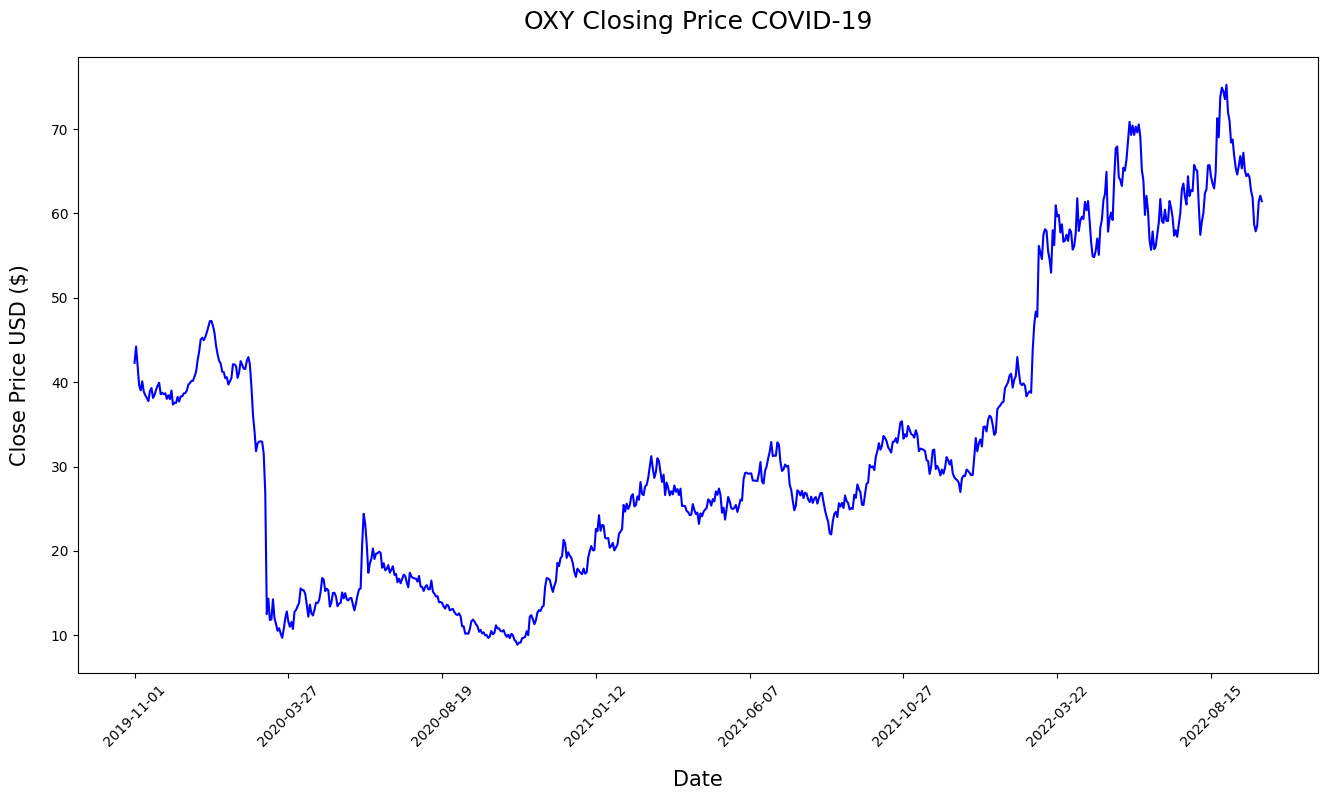

In [97]:
# Best practice to show some visualisation to see what the data looks like
# lets look at the close price on different dates
plt.figure(figsize=(16,8))
plt.title('OXY Closing Price COVID-19', fontsize=18, pad = 20)
plt.plot(oxy_data['Date'], oxy_data['Close'], color='blue')
plt.xlabel('Date', fontsize=15, labelpad=15)
plt.ylabel('Close Price USD ($)', fontsize=15, labelpad=15)
plt.xticks(ticks=range(0, oxy_data.shape[0], 100), labels=oxy_data['Date'].loc[::100], rotation=45)

In [98]:
# specify x and y 
# y = close
# x = everything else
X = oxy_data.iloc[:, 1:-1].values # the .values changes the data from a fataframe into an numpy array
y = oxy_data.iloc[:, -1].values

In [99]:
# data splitting 
# 80% of the data will be used for training
# 20% of the data will be used for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [100]:
# standard scaler = set mean to zero and standard deviation to y  (importing standart scalar)
sc = StandardScaler()
# fit the data to the scaler we usually do this with the training data X
X_train = sc.fit_transform(X_train) # fit the data to the scaler
X_test = sc.transform(X_test) # transform the data to the scaler


In [101]:
# train the model (importing linear regression)
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)


LinearRegression()

In [102]:
# predict the test set results
y_pred = regressor.predict(X_test) 

In [103]:
# compare the actual values to the predicted values
# create a dataframe to compare the actual values to the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,14.600000,14.802643
1,15.740000,15.748603
2,39.119999,38.229804
3,38.320000,37.933287
4,25.120001,25.324803
...,...,...
142,40.000000,40.063780
143,65.230003,65.008554
144,13.490000,13.543010
145,34.360001,34.743263


In [104]:
# compare the actual values to the predicted values to determine the accuracy of the model
# import metrics
# print the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print r squared
print('R Squared:', metrics.r2_score(y_test, y_pred))



Mean Absolute Error: 0.2431245176826277
Mean Squared Error: 0.1178837289392212
Root Mean Squared Error: 0.3433419999639153
R Squared: 0.9995854637099161


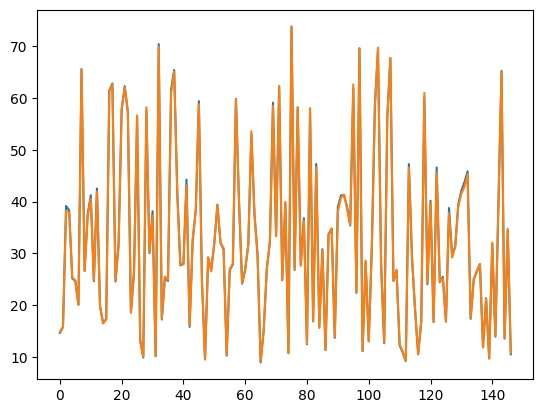

In [105]:
# plot the actual values to the predicted values

plt.plot(y_test)
plt.plot(y_pred)